# Logistic Regression

Trong notebook này, chúng ta sẽ cài đặt **Logistic Regression** từ đầu để giải quyết bài toán phân loại nhị phân.  

## **Bài toán đặt ra**
Ngân hàng có chương trình cho vay ưu đãi cho các đối tượng mua chung cư. Gần đây có một vài chung cư rất hấp dẫn (giá tốt, vị trí đẹp,…) nên lượng hồ sơ người nộp cho chương trình ưu đãi tăng đáng kể.
Chúng ta không thể xử lý hết hồ sơ và chúng ta cần có một giải pháp để có thể dự đoán hồ sơ mới là có nên cho vay hay không.
Sau khi phân tích thì có thể nhận thấy là hai yếu tố chính quyết định đến việc được vay tiền đó là mức lương và thời gian công tác.

Tập dữ liệu với hai đặc trưng:
- **Mức lương (triệu)**.
- **Kinh nghiệm (năm)**.

Nhãn (label) gồm 2 giá trị:
- `1`: được cho vay.
- `0`: bị từ chối.

👉 Nhiệm vụ: Xây dựng mô hình Logistic Regression để phân loại khách hàng.


**Nhập thư viện**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Hàm Sigmoid

In [1]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


## 2. Dữ liệu và trực quan hóa

Ta đọc dữ liệu từ file CSV và vẽ biểu đồ phân tán để quan sát.  
- Điểm đỏ: được cho vay.  
- Điểm xanh: bị từ chối.


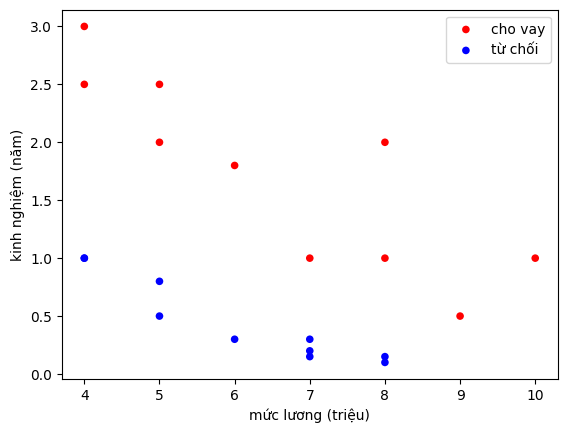

In [3]:
# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.show()

## 3. Hàm mất mát (Cross-Entropy Loss)

Hàm mất mát cho Logistic Regression là **Log Loss**:

\[
J= − (i=1)∑N (y i​ ∗log(^y​i​ )+(1−y i​ )∗log(1− ^yi))
\]

Trong đó:
- \(^y = ∑(Xw)\), với ∑ là hàm sigmoid.


## 4. Huấn luyện mô hình bằng Gradient Descent

Quy trình:
1. Khởi tạo vector trọng số `w`.  
2. Lặp nhiều vòng:
   - Tính dự đoán: 
   - Cập nhật trọng số:  
   - Tính và lưu lại giá trị mất mát.  
3. Kết quả: `w` là vector tham số mô hình.


In [4]:
# Thêm cột 1 vào dữ liệu x (để tính bias)
x = np.hstack((np.ones((N, 1)), x))

# Khởi tạo w
w = np.array([0., 0.1, 0.1]).reshape(-1, 1)

# Siêu tham số
numOfIteration = 1000
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.01

# Gradient Descent
for i in range(1, numOfIteration):
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict))
    w = w - learning_rate * np.dot(x.T, y_predict - y)
    if i % 100 == 0:
        print(f"Iteration {i}, Cost = {cost[i][0]:.4f}")


Iteration 100, Cost = 8.2317
Iteration 200, Cost = 6.9174
Iteration 300, Cost = 5.9606
Iteration 400, Cost = 5.2342
Iteration 500, Cost = 4.6682
Iteration 600, Cost = 4.2165
Iteration 700, Cost = 3.8483
Iteration 800, Cost = 3.5426
Iteration 900, Cost = 3.2847


## 5. Vẽ đường phân cách

Đường phân cách là tập hợp các điểm thỏa mãn:

\[
w_0 + w_1 x_1 + w_2 x_2 = 0
\]

Ta sẽ vẽ đường này để trực quan hóa mô hình Logistic Regression.


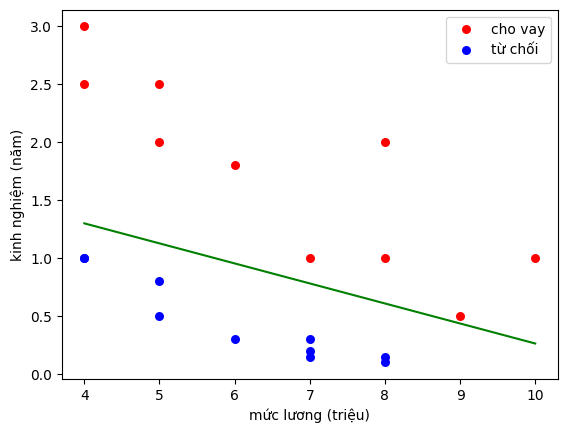

In [5]:
t = 0.5
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', s=30, label='từ chối')

# Vẽ đường phân cách
plt.plot((4, 10), (-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0]+10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.legend()
plt.show()
